# Merging data on LTS
In this section we will merge all the previously gathered data to create one datapool, that contains all the data that we need for our statistical analysis.
## Defintions and Imports

In [1]:
from HelperFunctions import loadExcelIntoDataFrame, loadObject, dumpObject, writeDataFrameToExcel
from Definitions import EXCEL_FILES_DIR
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_rows', 30) # Show all rows

In [2]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

## Loading data
### LTS/OPC

In [3]:
print("Reading in LTS/OPC data...")
df_lts_opc = loadObject("df_lts_opc")
print("Reading in LTS/OPC data finished.")

Reading in LTS/OPC data...
Reading in LTS/OPC data finished.


In [41]:
df_lts_opc.head()

lts_filePath  lts_gvkey  \
0  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
1  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
2  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
3  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
4  E:\00_git\invact\internal_Data\lts_improved_da...       1075   

             lts_company name  lts_finYear  opc_Total_Words  \
0  PINNACLE WEST CAPITAL CORP         2000             1225   
1  PINNACLE WEST CAPITAL CORP         2001             2237   
2  PINNACLE WEST CAPITAL CORP         2002             1930   
3  PINNACLE WEST CAPITAL CORP         2004             2050   
4  PINNACLE WEST CAPITAL CORP         2005             2040   

   opc_Total_Characters  opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  \
0                  6516                       20                 20   
1                 12317                       51                 19   
2                 10471                       21                 13   
3                 11083                       32                 16   
4                 11067                       22                 22   

   opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  LTS_available  
0                      5                        3              1  
1                      7                       16              1  
2                      3                       13              1  
3                      5                        6              1  
4                      5                        4              1

#### Adding LTS_available column
Adding a column LTS_available to dataframe, which will later indicate, that we have a LTS for the corresponding 13D filing. The use of adding this column will especially come clear in later steps.

In [5]:
df_lts_opc["LTS_available"] = [1] * len(df_lts_opc.index)
df_lts_opc.head()

lts_filePath  lts_gvkey  \
0  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
1  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
2  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
3  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
4  E:\00_git\invact\internal_Data\lts_improved_da...       1075   

             lts_company name  lts_finYear  opc_Total_Words  \
0  PINNACLE WEST CAPITAL CORP         2000             1225   
1  PINNACLE WEST CAPITAL CORP         2001             2237   
2  PINNACLE WEST CAPITAL CORP         2002             1930   
3  PINNACLE WEST CAPITAL CORP         2004             2050   
4  PINNACLE WEST CAPITAL CORP         2005             2040   

   opc_Total_Characters  opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  \
0                  6516                       20                 20   
1                 12317                       51                 19   
2                 10471                       21                 13   
3                 11083                       32                 16   
4                 11067                       22                 22   

   opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  LTS_available  
0                      5                        3              1  
1                      7                       16              1  
2                      3                       13              1  
3                      5                        6              1  
4                      5                        4              1

### 13G (Edgar) Data

In [6]:
print("Reading in 13G (Edgar) data...")
df_13g_files = loadObject("df_13g_files")
print("Reading in 13G (Edgar) data finished.")

Reading in 13G (Edgar) data...
Reading in 13G (Edgar) data finished.


In [7]:
df_13g_files.head()

13g_filing_date  13g_cik_sc  13g_cik_fc  \
0        19960212       94997      837581   
1        19960315      899596      315066   
2        20140418        2178     1605613   
3        20030214        3333     1040349   
4        20010214        4123        4123   

                                        13g_filePath  13g_filingYear  \
0  E:\00_git\invact\internal_Data\edgar\first_sta...            1996   
1  E:\00_git\invact\internal_Data\edgar\first_sta...            1996   
2  E:\00_git\invact\internal_Data\edgar\first_sta...            2014   
3  E:\00_git\invact\internal_Data\edgar\first_sta...            2003   
4  E:\00_git\invact\internal_Data\edgar\first_sta...            2001   

   13g_filingMonth  
0                2  
1                3  
2                4  
3                2  
4                2

### Removing all 13G datapoints where filing date is prior to Feb 17, 1998
As pointed out in the thesis, prior to Feb 17, 1998 passive investors also had to file a 13D. Therefore a distinction between 13D and 13G is only valid from Feb 17, 1998 forward.
Let's therefore remove all irrelevant datapoints from the dataframe.

In [8]:
def filing13GisRelevant(str_filing_date):
    dt_filing_date = datetime.strptime(str(str_filing_date), "%Y%m%d")
    decision_date = datetime(1998, 2, 17)
    if dt_filing_date >= decision_date:
        return 1
    else:
        return 0
    
df_13g_files["13g_isRelevant"] = list(map(filing13GisRelevant, df_13g_files["13g_filing_date"]))
df_13g_files

13g_filing_date  13g_cik_sc  13g_cik_fc  \
0             19960212       94997      837581   
1             19960315      899596      315066   
2             20140418        2178     1605613   
3             20030214        3333     1040349   
4             20010214        4123        4123   
...                ...         ...         ...   
183786        20020214      944624     1039756   
183787        20020215     1045598     1166153   
183788        20020213     1158387     1158387   
183789        20020214     1096691     1014925   
183790        20020213      912958      922825   

                                             13g_filePath  13g_filingYear  \
0       E:\00_git\invact\internal_Data\edgar\first_sta...            1996   
1       E:\00_git\invact\internal_Data\edgar\first_sta...            1996   
2       E:\00_git\invact\internal_Data\edgar\first_sta...            2014   
3       E:\00_git\invact\internal_Data\edgar\first_sta...            2003   
4       E:\00_git\invact\internal_Data\edgar\first_sta...            2001   
...                                                   ...             ...   
183786  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183787  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183788  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183789  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183790  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   

        13g_filingMonth  13g_isRelevant  
0                     2               0  
1                     3               0  
2                     4               1  
3                     2               1  
4                     2               1  
...                 ...             ...  
183786                2               1  
183787                2               1  
183788                2               1  
183789                2               1  
183790                2               1  

[183790 rows x 7 columns]

In [9]:
df_13g_files["13g_isRelevant"].value_counts()

1    162339
0     21451
Name: 13g_isRelevant, dtype: int64

As we can see, 21,451 of the 13G files need to be excluded from the further analysis. Let's remove them from the dataset. Then let's also remove the column 13g_isRelevant, as we will not need this column anymore.


In [10]:
df_13g_files = df_13g_files[df_13g_files["13g_isRelevant"] == 1]
df_13g_files = df_13g_files.drop("13g_isRelevant", 1)
df_13g_files

13g_filing_date  13g_cik_sc  13g_cik_fc  \
2             20140418        2178     1605613   
3             20030214        3333     1040349   
4             20010214        4123        4123   
5             20010214        4123        4123   
6             20010525       87196        4123   
...                ...         ...         ...   
183786        20020214      944624     1039756   
183787        20020215     1045598     1166153   
183788        20020213     1158387     1158387   
183789        20020214     1096691     1014925   
183790        20020213      912958      922825   

                                             13g_filePath  13g_filingYear  \
2       E:\00_git\invact\internal_Data\edgar\first_sta...            2014   
3       E:\00_git\invact\internal_Data\edgar\first_sta...            2003   
4       E:\00_git\invact\internal_Data\edgar\first_sta...            2001   
5       E:\00_git\invact\internal_Data\edgar\first_sta...            2001   
6       E:\00_git\invact\internal_Data\edgar\first_sta...            2001   
...                                                   ...             ...   
183786  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183787  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183788  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183789  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183790  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   

        13g_filingMonth  
2                     4  
3                     2  
4                     2  
5                     2  
6                     5  
...                 ...  
183786                2  
183787                2  
183788                2  
183789                2  
183790                2  

[162339 rows x 6 columns]

#### Adding corresponding LTS_fin_year
As outlined in the thesis, we will investigate the relationship between 13G filings with LTS filings. 

To make sure, that the LTS matched with the 13G filing was published prior to the crossing of the 5% share threshold, we will need to follow the 4 rules (2 rules for 13D, 2 rules for 13G) outlined in the thesis. 


For 13G the 2 rules are:
  * **RULE 13g_case1**: filing date in first 45 days of year,  
    then 13d_corresponding_LTS_finYear = filing_date.year - 3
  * **RULE 13g_case2**: filing date is after 45th day of year,  
    then 13d_corresponding_LTS_finYear = filing_date.year - 2

Let's write these two rules into code and write the 13g_corresponding_LTS_finYear to a new column. Let's also add another column by which we can determine the rule that has been applied in a specific case.

In [11]:
def determineFinYear13G(filing_date):
    corr_LTS_finYear = 0
    dt_filing_date = datetime.strptime(str(filing_date), "%Y%m%d")
    dt_filing_date_dayInYear = dt_filing_date.timetuple().tm_yday
    
    if dt_filing_date_dayInYear <= 45:
        corr_LTS_finYear = dt_filing_date.year - 3
    elif dt_filing_date_dayInYear > 45:
        corr_LTS_finYear = dt_filing_date.year - 2
    return corr_LTS_finYear
        
def determineCase13G(filing_date):
    case = "no_case"
    dt_filing_date = datetime.strptime(str(filing_date), "%Y%m%d")
    dt_filing_date_dayInYear = dt_filing_date.timetuple().tm_yday
    
    if dt_filing_date_dayInYear <= 45:
        case = "13g_case1"
    elif dt_filing_date_dayInYear > 45:
        case = "13g_case2"
    return case        

Let's now run both of these methods and look at the results.

In [12]:
df_13g_files["13g_corresponding_LTS_finYear"] = list(map(determineFinYear13G, df_13g_files["13g_filing_date"]))
df_13g_files["13g_corresponding_LTS_case"] = list(map(determineCase13G, df_13g_files["13g_filing_date"]))
df_13g_files

13g_filing_date  13g_cik_sc  13g_cik_fc  \
2             20140418        2178     1605613   
3             20030214        3333     1040349   
4             20010214        4123        4123   
5             20010214        4123        4123   
6             20010525       87196        4123   
...                ...         ...         ...   
183786        20020214      944624     1039756   
183787        20020215     1045598     1166153   
183788        20020213     1158387     1158387   
183789        20020214     1096691     1014925   
183790        20020213      912958      922825   

                                             13g_filePath  13g_filingYear  \
2       E:\00_git\invact\internal_Data\edgar\first_sta...            2014   
3       E:\00_git\invact\internal_Data\edgar\first_sta...            2003   
4       E:\00_git\invact\internal_Data\edgar\first_sta...            2001   
5       E:\00_git\invact\internal_Data\edgar\first_sta...            2001   
6       E:\00_git\invact\internal_Data\edgar\first_sta...            2001   
...                                                   ...             ...   
183786  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183787  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183788  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183789  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   
183790  E:\00_git\invact\internal_Data\edgar\first_sta...            2002   

        13g_filingMonth  13g_corresponding_LTS_finYear  \
2                     4                           2012   
3                     2                           2000   
4                     2                           1998   
5                     2                           1998   
6                     5                           1999   
...                 ...                            ...   
183786                2                           1999   
183787                2                           2000   
183788                2                           1999   
183789                2                           1999   
183790                2                           1999   

       13g_corresponding_LTS_case  
2                       13g_case2  
3                       13g_case1  
4                       13g_case1  
5                       13g_case1  
6                       13g_case2  
...                           ...  
183786                  13g_case1  
183787                  13g_case2  
183788                  13g_case1  
183789                  13g_case1  
183790                  13g_case1  

[162339 rows x 8 columns]

### Compustat Data

In [13]:
print("Reading in gvkey_lts lookup table...")
df_gvkey_cik = loadObject("df_gvkey_cik")
print("Reading in gvkey_lts lookup table finished.")

Reading in gvkey_lts lookup table...
Reading in gvkey_lts lookup table finished.


In [14]:
df_gvkey_cik.head()

cs_gvkey  cs_cik
0       1004    1750
16      1010  910627
20      1013   61478
31      1019    2668
33      1021  319126

## Merging
We have three dataframes, that we will merge in two main steps.  
In the first step, we will merge df_lts_opc with df_gvkey_cik.  
In the second step, we will merge the result from the first step with df_13d_files.
After each merging we will check the results, and if necessary improve the merging by adding additional data to the dataframes.
### Step 1 Merging df_lts_opc with df_gvkey_cik
#### Step 1.1 - Adding cik to row

In [15]:
df_mergedTable_13g = pd.merge(df_lts_opc, df_gvkey_cik, how = "left", left_on = ["lts_gvkey"], right_on = ["cs_gvkey"])

In [16]:
df_mergedTable_13g.head()

lts_filePath  lts_gvkey  \
0  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
1  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
2  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
3  E:\00_git\invact\internal_Data\lts_improved_da...       1075   
4  E:\00_git\invact\internal_Data\lts_improved_da...       1075   

             lts_company name  lts_finYear  opc_Total_Words  \
0  PINNACLE WEST CAPITAL CORP         2000             1225   
1  PINNACLE WEST CAPITAL CORP         2001             2237   
2  PINNACLE WEST CAPITAL CORP         2002             1930   
3  PINNACLE WEST CAPITAL CORP         2004             2050   
4  PINNACLE WEST CAPITAL CORP         2005             2040   

   opc_Total_Characters  opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  \
0                  6516                       20                 20   
1                 12317                       51                 19   
2                 10471                       21                 13   
3                 11083                       32                 16   
4                 11067                       22                 22   

   opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  LTS_available  cs_gvkey  \
0                      5                        3              1    1075.0   
1                      7                       16              1    1075.0   
2                      3                       13              1    1075.0   
3                      5                        6              1    1075.0   
4                      5                        4              1    1075.0   

     cs_cik  
0  764622.0  
1  764622.0  
2  764622.0  
3  764622.0  
4  764622.0

#### Step 1.2 - Checking and Improving Merging Results
Now that we have merged these two dataframes, let's check if we could match every gvkey to a cik.

In [17]:
df_mergedTable_13g.isna().sum()

lts_filePath                0
lts_gvkey                   0
lts_company name            0
lts_finYear                 0
opc_Total_Words             0
opc_Total_Characters        0
opc_OrgPsyCapConfidence     0
opc_OrgPsyCapHope           0
opc_OrgPsyCapOptimism       0
opc_OrgPsyCapResilience     0
LTS_available               0
cs_gvkey                   49
cs_cik                     49
dtype: int64

We see that for 49 data points, we couldn't assign a cik to the gvkey. This is due to these values missing in the lookup table.  
To fix this, let's first have a look at the data points, for which no matching between gvkey and LTS was possible.

In [18]:
df_rows_with_missing_values = df_mergedTable_13g[df_mergedTable_13g["cs_cik"].isna()]
df_rows_with_missing_values

lts_filePath  lts_gvkey  \
3630  E:\00_git\invact\internal_Data\lts_improved_da...       9480   
3631  E:\00_git\invact\internal_Data\lts_improved_da...       9480   
3632  E:\00_git\invact\internal_Data\lts_improved_da...       9480   
3633  E:\00_git\invact\internal_Data\lts_improved_da...       9480   
3634  E:\00_git\invact\internal_Data\lts_improved_da...       9480   
...                                                 ...        ...   
7844  E:\00_git\invact\internal_Data\lts_improved_da...     160256   
7845  E:\00_git\invact\internal_Data\lts_improved_da...     160256   
7846  E:\00_git\invact\internal_Data\lts_improved_da...     160256   
7847  E:\00_git\invact\internal_Data\lts_improved_da...     160256   
7848  E:\00_git\invact\internal_Data\lts_improved_da...     160256   

                  lts_company name  lts_finYear  opc_Total_Words  \
3630  SCIENCE APPLCTNS INTL CP-OLD         2003              946   
3631  SCIENCE APPLCTNS INTL CP-OLD         2004             1145   
3632  SCIENCE APPLCTNS INTL CP-OLD         2005             1058   
3633  SCIENCE APPLCTNS INTL CP-OLD         2006              693   
3634  SCIENCE APPLCTNS INTL CP-OLD         2007              781   
...                            ...          ...              ...   
7844   METROPCS COMMUNICATIONS INC         2007             1304   
7845   METROPCS COMMUNICATIONS INC         2008             2002   
7846   METROPCS COMMUNICATIONS INC         2009             1824   
7847   METROPCS COMMUNICATIONS INC         2010             2134   
7848   METROPCS COMMUNICATIONS INC         2011             2418   

      opc_Total_Characters  opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  \
3630                  5082                       11                  6   
3631                  6325                       17                 13   
3632                  5788                       10                  6   
3633                  3846                       10                  9   
3634                  4274                       11                 10   
...                    ...                      ...                ...   
7844                  6820                        8                 11   
7845                 10728                       10                 14   
7846                 10113                       13                 19   
7847                 11381                        8                 24   
7848                 12304                       17                 19   

      opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  LTS_available  cs_gvkey  \
3630                      6                        8              1       NaN   
3631                      3                        6              1       NaN   
3632                      5                        3              1       NaN   
3633                      3                        7              1       NaN   
3634                      1                        3              1       NaN   
...                     ...                      ...            ...       ...   
7844                      8                        4              1       NaN   
7845                     11                        4              1       NaN   
7846                     10                        4              1       NaN   
7847                     15                        3              1       NaN   
7848                     13                        4              1       NaN   

      cs_cik  
3630     NaN  
3631     NaN  
3632     NaN  
3633     NaN  
3634     NaN  
...      ...  
7844     NaN  
7845     NaN  
7846     NaN  
7847     NaN  
7848     NaN  

[49 rows x 13 columns]

There seem to be multiple companies, for which the matching was unsuccessful. Let's derive the companies in question from the aboue dataset.

In [19]:
missing_companies = df_rows_with_missing_values["lts_company name"].unique()
print(missing_companies)

['SCIENCE APPLCTNS INTL CP-OLD' 'INGEVITY CORP' 'ALCOA CORP'
 'ADVANSIX INC' 'ARCONIC INC' 'YUM CHINA HOLDINGS INC'
 'LAMB WESTON HOLDINGS INC' 'AMB PROPERTY CORP'
 'METROPCS COMMUNICATIONS INC']


In [20]:
print(f"We need to find the CIK for {len(missing_companies)} companies.")

We need to find the CIK for 9 companies.


Now we need to find a (cik, gvkey) pair for these 9 companies.
This can be done by going to https://www.sec.gov/edgar/searchedgar/cik.htm and searching for these companies. The results are shown below: 

| Company name | cik | gvkey |
|------|------|----|
|SCIENCE APPLCTNS INTL CP-OLD| 0000353394| 9480|
|SCIENCE APPLCTNS INTL CP-OLD| 0001571123| 9480|
|INGEVITY CORP| 0001653477| 27119|
|ALCOA CORP| 0001675149| 27638|
|ADVANSIX INC| 0001673985| 28070|
|ARCONIC INC| 0000004281| 28192|
|YUM CHINA HOLDINGS INC| 0001673358| 28499|
|LAMB WESTON HOLDINGS INC| 0001679273| 28790|
|AMB PROPERTY CORP| 0001045609| 65576|
|METROPCS COMMUNICATIONS INC| 0001283699| 160256|

Let's now add this information to our lookup table *df_gvkey_cik*.

In [21]:
missing_companies_information = [
    (353394, 9480),
    (1571123, 9480),
    (1653477, 27119),
    (1675149, 27638),
    (1673985, 28070),
    (4281, 28192),
    (1673358, 28499),
    (1679273, 28790),
    (1045609, 65576),
    (1283699, 160256)
]
df_missing_companies_information = pd.DataFrame(missing_companies_information, columns =  ["cs_cik","cs_gvkey"])
df_gvkey_cik = df_gvkey_cik.append(df_missing_companies_information)
df_gvkey_cik

C:\Users\Raphael\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


cs_cik  cs_gvkey
0      1750      1004
16   910627      1010
20    61478      1013
31     2668      1019
33   319126      1021
..      ...       ...
5      4281     28192
6   1673358     28499
7   1679273     28790
8   1045609     65576
9   1283699    160256

[17506 rows x 2 columns]

In [22]:
df_gvkey_cik = df_gvkey_cik.append(df_missing_companies_information)
df_gvkey_cik

cs_cik  cs_gvkey
0      1750      1004
16   910627      1010
20    61478      1013
31     2668      1019
33   319126      1021
..      ...       ...
5      4281     28192
6   1673358     28499
7   1679273     28790
8   1045609     65576
9   1283699    160256

[17516 rows x 2 columns]

#### Step 1.3 Rerun the merging process with updated cik-gvkey lookup table.
Now with a complete cik_gvkey lookup table, we again add the cik information to the *df_lts_opc* dataframe.

In [23]:
df_mergedTable_13g = pd.merge(df_lts_opc, df_gvkey_cik, how = "left", left_on = ["lts_gvkey"], right_on = ["cs_gvkey"])

Let's again check, if the merging was successful.

In [24]:
df_mergedTable_13g.isna().sum()

lts_filePath               0
lts_gvkey                  0
lts_company name           0
lts_finYear                0
opc_Total_Words            0
opc_Total_Characters       0
opc_OrgPsyCapConfidence    0
opc_OrgPsyCapHope          0
opc_OrgPsyCapOptimism      0
opc_OrgPsyCapResilience    0
LTS_available              0
cs_cik                     0
cs_gvkey                   0
dtype: int64

As we can see, we now have cik information for every LTS data point.

### Step 2 Merging merge(df_lts_opc, df_gvkey_cik) with df_13d_files
#### Merging
Let's now merge the resulting dataframe from the prior step with the df_13d_files dataframe.
We will merge on:  
(cs_cik, lts_finYear) --> (13d_cik_sc,13d_corresponding_LTS_finYear)

In [25]:
df_mergedTable_13g = pd.merge(df_mergedTable_13g, df_13g_files, how = "right", left_on = ["cs_cik", "lts_finYear"], right_on = ["13g_cik_sc","13g_corresponding_LTS_finYear"])

#### Investigating and improving the resulting dataframe
Let's have a look at the result:

In [26]:
df_mergedTable_13g

lts_filePath  lts_gvkey  \
0       E:\00_git\invact\internal_Data\lts_improved_da...     1075.0   
1       E:\00_git\invact\internal_Data\lts_improved_da...     1075.0   
2       E:\00_git\invact\internal_Data\lts_improved_da...     1075.0   
3       E:\00_git\invact\internal_Data\lts_improved_da...     1075.0   
4       E:\00_git\invact\internal_Data\lts_improved_da...     1075.0   
...                                                   ...        ...   
162373                                                NaN        NaN   
162374                                                NaN        NaN   
162375                                                NaN        NaN   
162376                                                NaN        NaN   
162377                                                NaN        NaN   

                  lts_company name  lts_finYear  opc_Total_Words  \
0       PINNACLE WEST CAPITAL CORP       2000.0           1225.0   
1       PINNACLE WEST CAPITAL CORP       2002.0           1930.0   
2       PINNACLE WEST CAPITAL CORP       2004.0           2050.0   
3       PINNACLE WEST CAPITAL CORP       2004.0           2050.0   
4       PINNACLE WEST CAPITAL CORP       2004.0           2050.0   
...                            ...          ...              ...   
162373                         NaN          NaN              NaN   
162374                         NaN          NaN              NaN   
162375                         NaN          NaN              NaN   
162376                         NaN          NaN              NaN   
162377                         NaN          NaN              NaN   

        opc_Total_Characters  opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  \
0                     6516.0                     20.0               20.0   
1                    10471.0                     21.0               13.0   
2                    11083.0                     32.0               16.0   
3                    11083.0                     32.0               16.0   
4                    11083.0                     32.0               16.0   
...                      ...                      ...                ...   
162373                   NaN                      NaN                NaN   
162374                   NaN                      NaN                NaN   
162375                   NaN                      NaN                NaN   
162376                   NaN                      NaN                NaN   
162377                   NaN                      NaN                NaN   

        opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  LTS_available  \
0                         5.0                      3.0            1.0   
1                         3.0                     13.0            1.0   
2                         5.0                      6.0            1.0   
3                         5.0                      6.0            1.0   
4                         5.0                      6.0            1.0   
...                       ...                      ...            ...   
162373                    NaN                      NaN            NaN   
162374                    NaN                      NaN            NaN   
162375                    NaN                      NaN            NaN   
162376                    NaN                      NaN            NaN   
162377                    NaN                      NaN            NaN   

          cs_cik  cs_gvkey 13g_filing_date  13g_cik_sc  13g_cik_fc  \
0       764622.0    1075.0        20030213      764622      913414   
1       764622.0    1075.0        20050214      764622      913414   
2       764622.0    1075.0        20070214      764622       80255   
3       764622.0    1075.0        20060803      764622       93748   
4       764622.0    1075.0        20070212      764622       93748   
...          ...       ...             ...         ...         ...   
162373       NaN       NaN        20180627     1482541     1742976   
162374       

In [27]:
df_mergedTable_13g.isna().sum()

lts_filePath                     155278
lts_gvkey                        155278
lts_company name                 155278
lts_finYear                      155278
opc_Total_Words                  155278
opc_Total_Characters             155278
opc_OrgPsyCapConfidence          155278
opc_OrgPsyCapHope                155278
opc_OrgPsyCapOptimism            155278
opc_OrgPsyCapResilience          155278
LTS_available                    155278
cs_cik                           155278
cs_gvkey                         155278
13g_filing_date                       0
13g_cik_sc                            0
13g_cik_fc                            0
13g_filePath                          0
13g_filingYear                        0
13g_filingMonth                       0
13g_corresponding_LTS_finYear         0
13g_corresponding_LTS_case            0
dtype: int64

We can see, that for 53,285 out of the 53,644 datapoints, there was no LTS file. We will mark these data points by setting their value in the column *LTS_available* to 0.

In [28]:
df_mergedTable_13g["LTS_available"] = df_mergedTable_13g["LTS_available"].fillna(0)

Now we can easily distinguish between rows (13D filings), to which a corresponding LTS exists, by checking the value in the column *LTS_available*. If this value is equal to 1, a LTS exists. If it is equal to zero, no LTS exists.  

#### Exporting the data to excel file and pickle file
Let's now export this data to an excel file.  
Please note that this is not the final form of the excel file that we will use for the statistical analysis, but the raw data, that our merging process yielded.
We will polish the data in following steps.

In [29]:
writeDataFrameToExcel(df_mergedTable_13g, "Results_based_on_LTS_raw_13g")

Start writing data from dataframe to file Results_based_on_LTS_raw_13g.xlsx.
Starting time: 18:16:24
Finish time: 18:17:01


The file can be found in the following folder:

In [30]:
print(EXCEL_FILES_DIR)

E:\00_git\invact\output_ExcelFiles


Let's also save the dataframe itself.

In [31]:
dumpObject(df_mergedTable_13g, "df_mergedTable_13g")

### Further analysis of the data
#### Successful merges of 13G and LTS
Let's view all the 13G files, for which a corresponding 13D exisits:

In [32]:
df_mergedTable_13g[df_mergedTable_13g["LTS_available"] == 1]

lts_filePath  lts_gvkey  \
0     E:\00_git\invact\internal_Data\lts_improved_da...     1075.0   
1     E:\00_git\invact\internal_Data\lts_improved_da...     1075.0   
2     E:\00_git\invact\internal_Data\lts_improved_da...     1075.0   
3     E:\00_git\invact\internal_Data\lts_improved_da...     1075.0   
4     E:\00_git\invact\internal_Data\lts_improved_da...     1075.0   
...                                                 ...        ...   
7095  E:\00_git\invact\internal_Data\lts_improved_da...   316056.0   
7096  E:\00_git\invact\internal_Data\lts_improved_da...   316056.0   
7097  E:\00_git\invact\internal_Data\lts_improved_da...   316056.0   
7098  E:\00_git\invact\internal_Data\lts_improved_da...   316056.0   
7099  E:\00_git\invact\internal_Data\lts_improved_da...   316056.0   

                lts_company name  lts_finYear  opc_Total_Words  \
0     PINNACLE WEST CAPITAL CORP       2000.0           1225.0   
1     PINNACLE WEST CAPITAL CORP       2002.0           1930.0   
2     PINNACLE WEST CAPITAL CORP       2004.0           2050.0   
3     PINNACLE WEST CAPITAL CORP       2004.0           2050.0   
4     PINNACLE WEST CAPITAL CORP       2004.0           2050.0   
...                          ...          ...              ...   
7095                ALLEGION PLC       2013.0           1406.0   
7096                ALLEGION PLC       2013.0           1406.0   
7097                ALLEGION PLC       2014.0            458.0   
7098                ALLEGION PLC       2014.0            458.0   
7099                ALLEGION PLC       2014.0            458.0   

      opc_Total_Characters  opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  \
0                   6516.0                     20.0               20.0   
1                  10471.0                     21.0               13.0   
2                  11083.0                     32.0               16.0   
3                  11083.0                     32.0               16.0   
4                  11083.0                     32.0               16.0   
...                    ...                      ...                ...   
7095                7880.0                     11.0               17.0   
7096                7880.0                     11.0               17.0   
7097                2346.0                      5.0                5.0   
7098                2346.0                      5.0                5.0   
7099                2346.0                      5.0                5.0   

      opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  LTS_available  \
0                       5.0                      3.0            1.0   
1                       3.0                     13.0            1.0   
2                       5.0                      6.0            1.0   
3                       5.0                      6.0            1.0   
4                       5.0                      6.0            1.0   
...                     ...                      ...            ...   
7095                    1.0                      4.0            1.0   
7096                    1.0                      4.0            1.0   
7097                    0.0                      2.0            1.0   
7098                    0.0                      2.0            1.0   
7099                    0.0                      2.0            1.0   

         cs_cik  cs_gvkey 13g_filing_date  13g_cik_sc  13g_cik_fc  \
0      764622.0    1075.0        20030213      764622      913414   
1      764622.0    1075.0        20050214      764622      913414   
2      764622.0    1075.0        20070214      764622       80255   
3      764622.0    1075.0        20060803      764622       93748   
4      764622.0    1075.0        20070212      764622       93748   
...         ...       ...             ...         ...         ...   
7095  1579241.0  316056.0        20160212     1579241       80255   
7096  1579241.0  316056.0        20160128     1579241     1364742   
7097  1579241.0  316056.0        20170125     

#### 13G Filing years
Let's analyse the years, in which the 13G were filed:

In [33]:
df_mergedTable_13g['13g_filingYear'].value_counts().sort_index()

1998     5233
1999     9428
2000     9434
2001     9158
2002     6711
2003     6840
2004     7690
2005     9078
2006    10101
2007    10647
2008    11084
2009     8509
2010     7520
2011     6610
2012     6438
2013     6693
2014     7046
2015     7451
2016     6276
2017     5804
2018     4627
Name: 13g_filingYear, dtype: int64

In [34]:
print(f"There are {str(len(df_mergedTable_13g.index))} data points.")

There are 162378 data points.


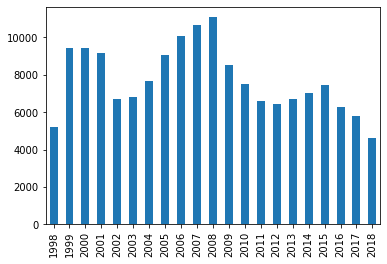

In [35]:
fig, ax = plt.subplots()
df_mergedTable_13g['13g_filingYear'].value_counts().sort_index().plot(ax=ax, kind='bar')

#### 13G Filing Months
Let's analyse the months, in which the 13G were filed:

In [36]:
df_mergedTable_13g['13g_filingMonth'].value_counts().sort_index()

1     17938
2     92147
3      6631
4      5404
5      5150
6      4949
7      5668
8      5021
9      4588
10     4856
11     4981
12     5045
Name: 13g_filingMonth, dtype: int64

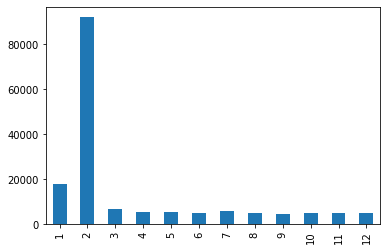

In [37]:
fig, ax = plt.subplots()
df_mergedTable_13g['13g_filingMonth'].value_counts().sort_index().plot(ax=ax, kind='bar')

#### 13G corresponding method - Case analysis
Let's look at how many times the 2 methods described earlier in section *Adding corresponding LTS_fin_year* were each used.

In [38]:
df_mergedTable_13g["13g_corresponding_LTS_case"].value_counts()

13g_case1    95736
13g_case2    66642
Name: 13g_corresponding_LTS_case, dtype: int64

In [39]:
fig, ax = plt.subplots()
df_mergedTable_13g['13g_corresponding_LTS_case'].value_counts().sort_index().plot(ax=ax, kind='bar')